핸즈온 4장 모델 훈련   p. 157 - 184
# Chapter 4. 모델 훈련

###**4.1 선형 회귀**
- 가중치의 합과 편향(절편)이라는 상수를 더해 예측을 생성

**4.1.1 정규 방정식**
- 해석적인 방법
- 정규방정식. 결과를 얻을 수 있는 수학 공식
- 유사역행렬(무어-펜로즈 역행렬)
   - np.linalg.pinv( )
   - 특잇값 분해(SVD)

In [9]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

In [10]:
X_b = np.c_[np.ones((100,1)), X]  # 모든 샘플에 x0 = 1 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [11]:
theta_best

array([[3.82313228],
       [3.05285391]])

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] # 모든 샘플에 x0 =1 을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.82313228],
       [9.92884009]])

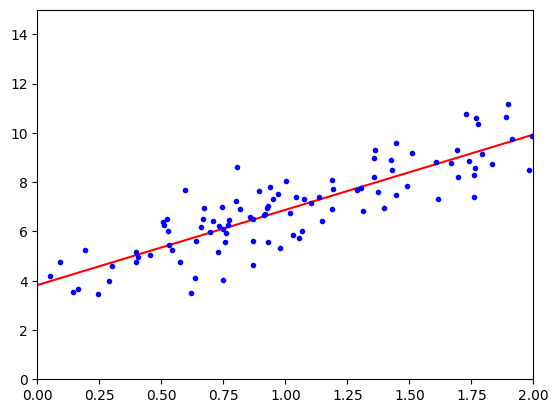

In [13]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2,0,15])
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [15]:
lin_reg.intercept_, lin_reg.coef_

(array([3.82313228]), array([[3.05285391]]))

In [16]:
lin_reg.predict(X_new)

array([[3.82313228],
       [9.92884009]])

In [17]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.82313228],
       [3.05285391]])

In [18]:
import numpy as np
np.linalg.pinv(X_b).dot(y)

array([[3.82313228],
       [3.05285391]])

**4.1.2 계산 복잡도**

역행렬을 계산하는 계산 복잡도 (계산 시간)
- 일반적 O(n^2.4) ~ O(n^3) 사이
- 사이킷런의 LinearRegression 클래스 O(n^2) (n은 특성수)


###**4.2 경사 하강법(GD, gradient descent)**
- 파라미터 벡터 세타 : 무작위 초기화 (random initialization)
- 학습률(learning rate) : 중요한 파라미터. 너무 작으면 반복 시간이 너무 많이 소요됨. 너무 크면, 비용 함수는 매끄럽진 않기 때문에 포인트가 어디로 튈지 모름.
- 경사 하강법의 문제점 : 무작위 초기화 때문에 알고리즘이 왼쪽에서 시작하면 전역 최솟값(global minimum)보다 지역 최솟값(local minimum)에 수렴

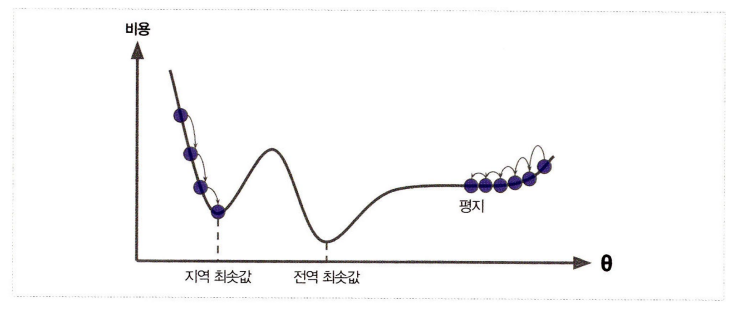

- 비용함수는 그릇 모양을 하고 있음. 특성들의 스케일이 너무 다르면 길쭉한 모양일 수 있음. 결국 최솟값이 도달하겠지만 시간이 오래 걸릴 것. 따라서, 경사 하강법 사용 시 반드시 **모든 특성이 같은 스케일을 갖도록 만들어야함**.

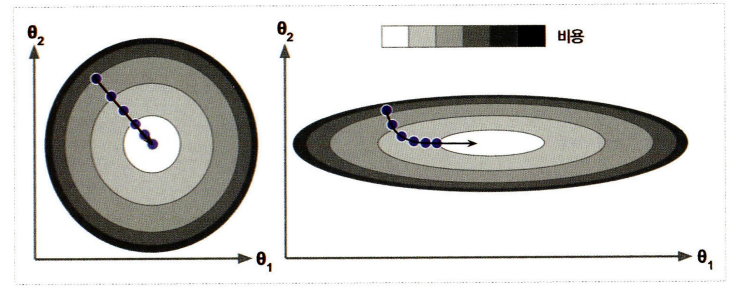

**4.2.1 배치 경사 하강법**
- 편도함수 = partial deriative . 파라미터 변경시 비용함수가 얼마나 바뀌는지

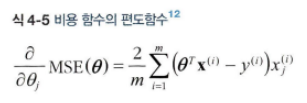

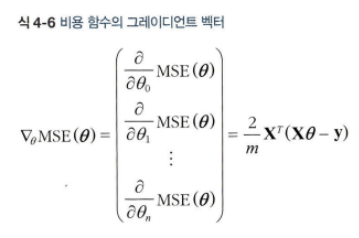

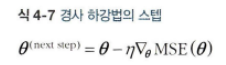

- 그림 4-8. 오른쪽으로 갈수록 학습률이 높음. 오른쪽으로 갈수록 시간이 적게 걸림.

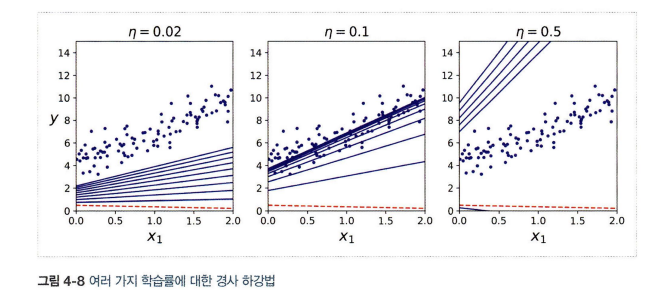

- 반복횟수 지정법. 벡터의 노름이 허용오차(tolerance)보다 작아지면 경사하강법 중지.


In [19]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [20]:
theta

array([[3.82313228],
       [3.05285391]])

**4.2.2 확률적 경사 하강법**
- 무작위성의 딜레마


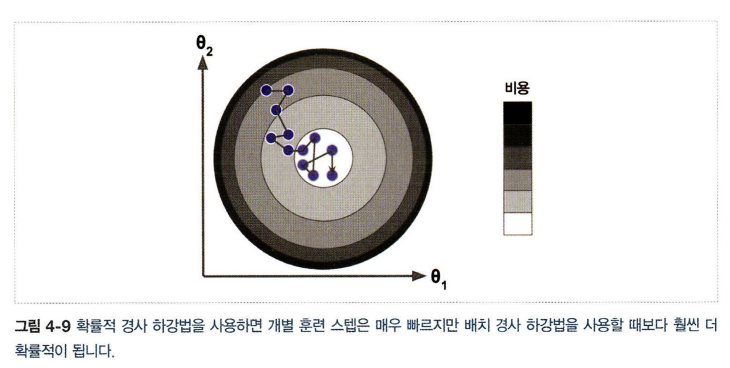

In [31]:
n_epochs = 50
t0, t1 = 5, 50   # learning schedule hyper-parameter

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)   # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients

In [32]:
theta

array([[ 4.1839846 ],
       [-0.63644786]])

In [21]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [22]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.73132758]), array([3.1151227]))

**4.2.3 미니배치 경사 하강법 (mini-batch gradient descent)**
- 미니배치에 대해 그레이디언트를 계산
- 선형 회귀와 같지 않고 지역 최솟값이 문제가 되는 경우 SGD보다 지역 최솟값에서 빠져나오기 더 힘들 수 있음.


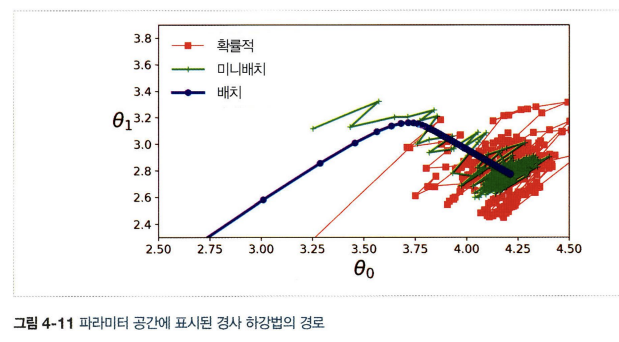

- 선형 회귀를 사용한 알고리즘 비교

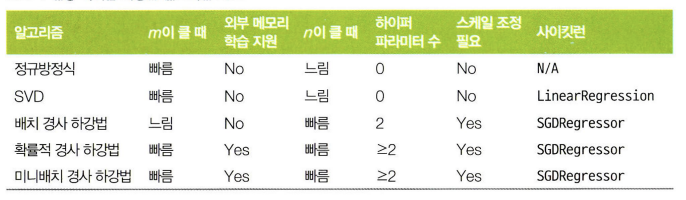

###**4.3 다항 회귀**
- 사이킷런의 PolynomialFeatures는 주어진 차수까지 특성 간의 모든 교차항을 추가하여 예측.

In [23]:
# 2차 방정식의 비선형 데이터 생성
m = 100
X = 6 * np.random.rand(m,1) -3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

In [25]:
# 사이킷런의 PolynomialFeatures로 훈련 데이터 변환
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.5794095])

In [26]:
X_poly[0]

array([-0.5794095 ,  0.33571537])

In [27]:
# 확장된 훈련 데이터에 Linear Regression 사용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.93773128]), array([[1.00933698, 0.52072659]]))

###**4.4 학습 곡선**
모델이 데이터에 얼마나 적합한가?

   1. 교차검증
   2. 학습곡선. 훈련세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련시킴.



In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors),'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors),'b-', linewidth=3, label='검정 세트')

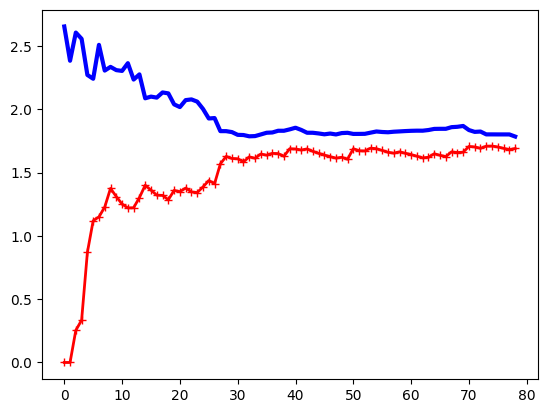

In [29]:
# 단순 선형 회귀 모델의 학습 곡선
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

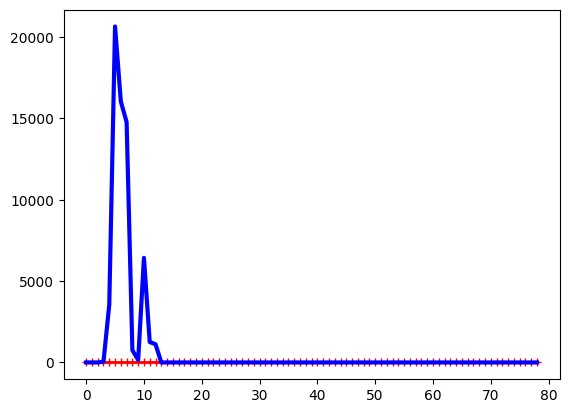

In [30]:
# 10차 다항회귀 모델의 학습곡선
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)